# <img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFFY-15-M Cyber Security Analytics

# Portfolio Task 2:
## Conduct an investigation on a URL database to develop a DGA classification system using machine learning techniques 
---

**Student Name:** Md Abdullah Al Faruk<br>
<b>Module Instructor:</b> Dr Phil Legg

#### Provided Materials:
A data set of URLs based on DGA.

#### Goals:
To develop a machine learning tool using Python and scikit-learn that can identify URLs based on DGA by deriving a suitable set of features from the data for developing a machine learning classifier using Python data science libraries and compare the results of 3 different classifiers - Logistic Regression, Random Forest and MLP Classifier
by using the scikit-learn library, and provide a confusion matrix and an accuracy score for each classifier


---
### Step 1: Importing Necessary Libraries
At the very beginning all required libraries are imported.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


from collections import Counter
from timeit import timeit
from publicsuffixlist import PublicSuffixList
import math
import tldextract

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
#pd.set_option('display.max_rows', 24000)

---
### Step 2: Importing Dataset
After importing the libraries provided data set will be loaded. (This portion is provided)

---

In [2]:
df = pd.read_csv('./dga-24000.csv')
df.head()

,Domain,Family
0,google.com,benign
1,facebook.com,benign
2,youtube.com,benign
3,twitter.com,benign
4,instagram.com,benign


---
### Step 3: Extracting Features, Pre-processing and Final Processing of Features
After the initial steps, such as importing libraries and dataset the most important part of this task is performed which is feature extraction. </br>
In machine learning feature extraction plays a crucial role to achieve the desired outcome.</br>
There are numerous amounts of options in term of choosing features to develop a ML tool for detecting DGA based URLs.</br>


---

---
#### Step 3.1: Extracting TLD, Second Level Domain and Subdomain
In an URL there are several parts having different meanings. Such as- in 'mail.google.com', <b>'com'</b> is the top-level domain, <b>'google'</b> is second level domain and <b>'mail'</b> is the subdomain.</br>There can be several parts of a subdomain and top-level domain.</br>
So, at the beginning the top-level domain, second level domain and subdomain will be extracted from the dataset's domain column by using Python's <b>tldextract</b> libary.</br><br>
For the ease of understanding, I have created another dataframe for visualising the extracted data along with other necessary data.


---

In [3]:
initFeature = pd.DataFrame()
initFeature['URL'] = df['Domain']
initFeature['SLD'] = df['Domain'].apply(lambda url: tldextract.extract(url).domain)  #Second Level Domain
initFeature['TLD'] = df['Domain'].apply(lambda url: tldextract.extract(url).suffix)  #Top Level Domain
initFeature['SD'] = df['Domain'].apply(lambda url: tldextract.extract(url).subdomain)#Subdomain
initFeature['Class'] = df['Family']

In [4]:
initFeature.tail()

,URL,SLD,TLD,SD,Class
23995,fhyibfwhpahb.su,fhyibfwhpahb,su,,locky
23996,nlgusntqeqixnqyo.org,nlgusntqeqixnqyo,org,,locky
23997,awwduqqrjxttmn.su,awwduqqrjxttmn,su,,locky
23998,ccxmwif.pl,ccxmwif,pl,,locky
23999,yhrryqjimvgfbqrv.pw,yhrryqjimvgfbqrv,pw,,locky


---
#### Step 3.2: Feature extraction
In a new dataframe I started to store the extracted features that I will be using in the classifiers. Ikwu(2021) has discussed about several types of features that can be extracted from an URL, such as, lexical, host-based or content features.<br>
I have used several lexical features guided in this material.

---

In [5]:
featuresTable = pd.DataFrame()
featuresTable['URL'] = initFeature['URL']
featuresTable['TLD'] = initFeature['TLD']
featuresTable['SLD'] = initFeature['SLD']

---
#### Step 3.2.1: Find the length of top-level domain

---

In [6]:
featuresTable['Length of TLD'] = initFeature['TLD'].str.len() - initFeature['TLD'].str.count('\.')

----
#### Step 3.2.2: Find the length of second-level domain
As a feture the length of second-level domain is calculated as follows and added with featuresTable dataframe.

---

In [7]:
featuresTable['Length of SLD'] = initFeature['SLD'].str.len()

----
#### Step 3.2.3: Find the number of subdomains
As a feature the number of subdomains is calculated and added with the dataframe.

---

In [8]:
featuresTable['Number of Subdomains'] = initFeature['SD'].str.count('\.')+1

----
#### Step 3.2.4: Find the length of subdomains
As a feature the collective length of all the subdomains under a second-level domain is calculated and added with the dataframe.

---

In [9]:
featuresTable['Length of Subdomains'] = initFeature['SD'].str.len() - initFeature['SD'].str.count('\.')

---
#### Step 3.2.5: Find the presence of digits
As a feature the presence of digits is looked up.

---

In [10]:
featuresTable['Presence of Digits'] = initFeature['URL'].str.contains('1|2|3|4|5|6|7|8|9|0', regex=True)

---
#### Step 3.2.6: Find the ratio of digits  
As a feature the ratio of digits is calculated.

---

In [11]:
featuresTable['Ratio of Digits'] = initFeature['URL'].str.count('1|2|3|4|5|6|7|8|9|0')/(featuresTable['Length of SLD']+featuresTable['Length of Subdomains']).fillna(0)


---
#### Step 3.2.7: Find the ratio of vowels 
As a feature the ratio of vowels is calculated.

---

In [12]:
featuresTable['Ratio of Vowels'] = (featuresTable['SLD'].str.count('a|e|i|o|u|A|E|I|O|U') + 
                                    initFeature['SD'].str.count('a|e|i|o|u|A|E|I|O|U')) / (featuresTable['Length of SLD']+featuresTable['Length of Subdomains']).fillna(0)


---
#### Step 3.2.8: Find the ratio of consonants 
As a feature the ratio of consonants is calculated.

---

In [13]:
featuresTable['Ratio of Consonants'] = ((featuresTable['Length of SLD'] +featuresTable['Length of Subdomains'])-
                                        ((featuresTable['SLD'].str.count('a|e|i|o|u|A|E|I|O|U|1|2|3|4|5|6|7|8|9|0')+
                                          initFeature['SD'].str.count('a|e|i|o|u|A|E|I|O|U|1|2|3|4|5|6|7|8|9|0')))) / (featuresTable['Length of SLD']+featuresTable['Length of Subdomains']).fillna(0)

                                             

---
#### Step 3.2.9: Find the entropy of the URLs
As a feature the entropy is calculated.<br><br>
For finding the entropy of each domain, I have followed the method by Zhang, Zhou and Dai (2022).

---

In [14]:
def entropy(string):
    prob = [float(string.count(c)) / len(string) for c in dict.fromkeys(list(string))] #To get the probability of chars in string

    entropy = - sum([ p * math.log(p) / math.log(2.0) for p in prob ]) #To calculate the entropy

    return entropy

def entropyExtract():
    featuresTable['Entropy']= (featuresTable['SLD'].apply(lambda x: entropy(x))+
                               initFeature['SD'].apply(lambda x: entropy(x)))

entropyExtract()

---
#### Step 3.2.10: Find the N-Gram of the URLs
As a feature the N-Gram is calculated for each Domains.<br><br>
For finding the N-Grams I have followed the methods discussed in SKLearn (2018) and used by Sconzo (2022).


---

In [15]:
word_df = pd.read_fwf('./words.txt', names=['word'], header=None, dtype={'word': str}, encoding='utf-8')
word_df = word_df[word_df['word'].map(lambda x: str(x).isalpha())]
word_df = word_df.applymap(lambda x: str(x).strip().lower())
word_df = word_df.dropna()
word_df = word_df.drop_duplicates()
#word_dataframe.head(10) 

In [16]:
dict_vc = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-5, max_df=1.0)
counts_matrix = dict_vc.fit_transform(word_df['word'])
dict_counts = np.log10(counts_matrix.sum(axis=0).getA1())
ngrams_list = dict_vc.get_feature_names_out()

def ngram_count(domain):
    dict_match = dict_counts * dict_vc.transform([domain]).T

---
Here, a list of dictionary words is read, named <b>words.txt</b> collected from Sconzo (2022).

---

In [17]:
featuresTable['Word Gram_URL']= dict_counts * dict_vc.transform(initFeature['URL']).T
featuresTable['Word Gram_SLD']= dict_counts * dict_vc.transform(initFeature['SLD']).T
featuresTable['Word Gram_SD']= dict_counts * dict_vc.transform(initFeature['SD']).T

---
Here I have calculated N-Grams for the Domain, Sub-Level Domains and Sub-Domains as extracted in <b>Step 3.1</b>.<br>
Without using this for the Sub Domains, accuracy was almost similar as of after using it for Sub Domains. But while using it for sub-domains it gave better output for MLP CLassifier in terms of precision, recall and accuracy.

---

---
#### Step 3.3: Processing of features
We know that machine learning classifiers requires to have numerical feature values. In so far collected features, there are several values which are not numeric. So, I have created another dataframe containing only the essentially required values from the previous dataframe where extracted features are accomodated.

---

In [18]:
finalFeatures = pd.DataFrame()

In [19]:
finalFeatures['Length of TLD'] = featuresTable['Length of TLD'].astype(float)
finalFeatures['Length of SLD'] = featuresTable['Length of SLD'].astype(float)
finalFeatures['Nos of SD'] = featuresTable['Number of Subdomains'].astype(float)
finalFeatures['Length of SD'] = featuresTable['Length of Subdomains'].astype(float)
finalFeatures['Presence of Digits'] = featuresTable['Presence of Digits'].astype(int)
finalFeatures['RoD'] = featuresTable['Ratio of Digits'].fillna(0)
finalFeatures['RoV'] = featuresTable['Ratio of Vowels'].fillna(0)
finalFeatures['RoC'] = featuresTable['Ratio of Consonants'].fillna(0)
finalFeatures['Entropy'] = featuresTable['Entropy'].astype(float)
finalFeatures['Word Gram_URL'] = featuresTable['Word Gram_URL'].fillna(0)
finalFeatures['Word Gram_SLD'] = featuresTable['Word Gram_SLD'].fillna(0)
finalFeatures['Word Gram_SD'] = featuresTable['Word Gram_SD'].fillna(0)

<b>Remarks: </b>I had found several columns with NaN values. So I used dataframe.fillna(0) to replace all NaN values with 0 as NaN values do not work with most of the classifiers.<br>
I used the following script to verify if any NaN is remaining in the dataset.

In [20]:
finalFeatures[finalFeatures.isna().any(axis=1)]

,Length of TLD,Length of SLD,Nos of SD,Length of SD,Presence of Digits,RoD,RoV,RoC,Entropy,Word Gram_URL,Word Gram_SLD,Word Gram_SD


<b>Remarks: </b>No more NaN is present now.

---
### Step 4: Running the Machine Learning Classifiers

---

---
#### Step 4.1: Splitting the dataset for training and testing
---

In [21]:
X = finalFeatures
y = (initFeature['Class']) #pd.get_dummies
#y = LabelEncoder().fit_transform(y.astype('str'))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
Here I have divided the entire dataset into two parts, for training 80% and rest for testing.

---

In [23]:
y_train.count()

19200

In [24]:
y_test.count()

4800

---
From above two cells it is clearly proved that the dataset has been properly divided into training and test dataset.

---

---
### Step 5: Logistic Regression Classifier

---

In [25]:
clf1 = LogisticRegression(random_state=42)

---
#### Step 5.1: Fitting the training set in the classifier

---

In [26]:
clf1.fit(X_train, y_train)

/Users/peash/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

---
#### Step 5.2: Prediction From The Test Dataset

---

In [27]:
predicted1 = clf1.predict(X_test)

---
#### Step 5.3: Accuracy Score

---

In [28]:
accuracy_score(y_test, predicted1)

0.5397916666666667

---
#### Step 5.4: Classification Report

---

In [29]:
print(
    f"Classification report for classifier {clf1}:\n"
    f"{classification_report(y_test, predicted1)}\n"
)

Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

     banjori       0.81      0.94      0.87       175
      benign       0.58      0.62      0.60       190
      emotet       0.39      0.88      0.54       193
      flubot       0.00      0.00      0.00       208
    gameover       0.89      0.99      0.94       211
       locky       0.02      0.01      0.02       214
     murofet       0.32      0.07      0.11       207
      mydoom       0.43      0.26      0.33       201
       necro       0.76      0.98      0.85       198
      necurs       0.21      0.33      0.26       199
     ngioweb       0.76      0.59      0.67       202
   pykspa_v1       0.39      0.38      0.39       204
      qadars       0.62      0.21      0.31       193
      qakbot       0.21      0.31      0.25       199
      ramnit       0.18      0.18      0.18       177
     ranbyus       0.28      0.17      0.21       186
      r

---

<b>Analysis from Classification Report:</b><br> By using the features, Logistic Regression classifier with random-state=42, is providing <b>accuracy</b> of <b>54%</b>. <br>
Maximum <b>precision</b> of <b>98%</b> and minimum of <b>0%</b> for <b>symmi</b> family and <b>flubot</b> family.<br>
For <b>benign</b> family it is providing <b>58%</b> precision with <b>62%</b> recall and <b>60%</b> F1-score.<br>
Considering the recall it is giving <b>100%</b> for 2 families and more than <b>90%</b> for 4 other families among the 24 families.
    

---

---
#### Step 5.5: Confusion Matrix

---

In [30]:
#disp = ConfusionMatrixDisplay.from_predictions(y_test, predicted1)

#disp.figure_.suptitle("Confusion Matrix for Logistic Regression")
#print(f"Confusion matrix for logistic regression:\n{disp.confusion_matrix}")

#plt.show()

/Users/peash/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


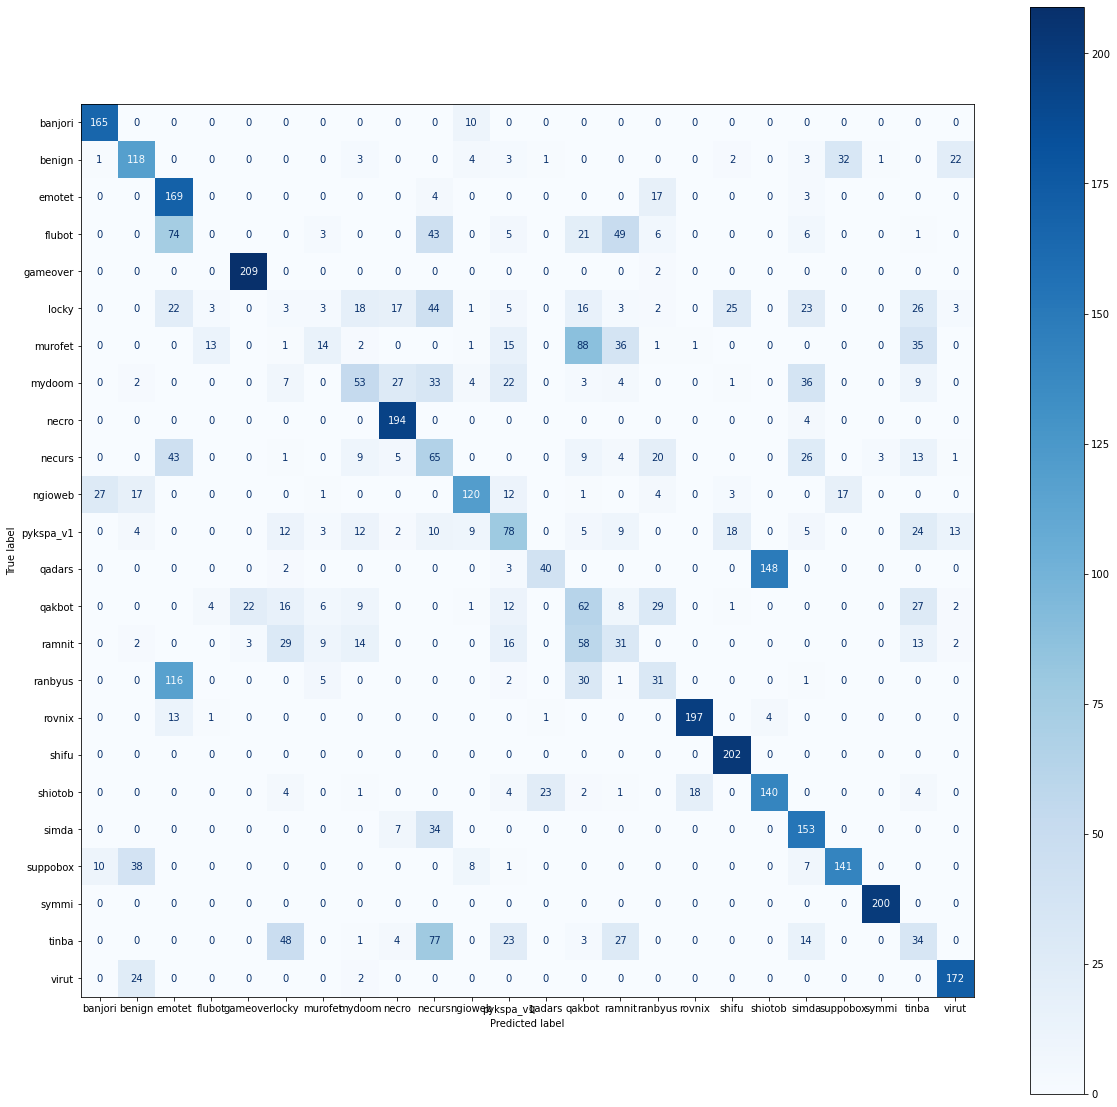

In [31]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(clf1, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

---
From the above <b>Confusion Matrix</b>, it is clearly shown how much accurate predictions and wrong predictions were made by the classifier from te test data set based on the features extracted.

---

---
### Step 6: Random Forest Classifier

---

In [32]:
clf2 = RandomForestClassifier(max_depth=100, random_state=42)

---
#### Step 6.1: Fitting the training set in the classifier

---

In [33]:
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=42)

---
#### Step 6.2: Prediction from the test set

---

In [34]:
predicted2 = clf2.predict(X_test)

---
#### Step 6.3: Accuracy score

---

In [35]:
accuracy_score(y_test, predicted2)

0.8214583333333333

---
#### Step 6.4: Classification report

---

In [36]:
print(
    f"Classification report for classifier {clf2}:\n"
    f"{classification_report(y_test, predicted2)}\n"
)

Classification report for classifier RandomForestClassifier(max_depth=100, random_state=42):
              precision    recall  f1-score   support

     banjori       0.99      1.00      1.00       175
      benign       0.74      0.66      0.70       190
      emotet       0.92      0.99      0.95       193
      flubot       0.81      0.80      0.81       208
    gameover       1.00      1.00      1.00       211
       locky       0.48      0.34      0.40       214
     murofet       0.60      0.73      0.66       207
      mydoom       0.86      0.93      0.89       201
       necro       0.87      0.93      0.90       198
      necurs       0.59      0.43      0.50       199
     ngioweb       0.89      0.85      0.87       202
   pykspa_v1       0.84      0.84      0.84       204
      qadars       0.91      0.95      0.93       193
      qakbot       0.55      0.49      0.52       199
      ramnit       0.39      0.35      0.37       177
     ranbyus       0.79      0.91      0.8

---

<b>Analysis from Classification Report:</b><br> By using the features, Random Forest Classifier with max-depth=100 and random-state=42, is providing <b>accuracy</b> of <b>82%</b>. <br>
Maximum <b>precision</b> of <b>100%</b> for <b>gameover</b>, <b>rovnix</b> and <b>symmi</b> and minimum of <b>48%</b> for <b>locky</b> family.<br>
For <b>benign</b> family it is providing <b>74%</b> precision with <b>66%</b> recall and <b>70%</b> F1-score.<br>
Considering the recall it is giving <b>100%</b> for 3 families and more than <b>90%</b> for 10 other families among the 24 families.
    

---

---
#### Step 6.5: Confusion matrix

---

In [37]:
#disp = ConfusionMatrixDisplay.from_predictions(y_test, predicted2)

#disp.figure_.suptitle("Confusion Matrix for Random Forest")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

#plt.show()

/Users/peash/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


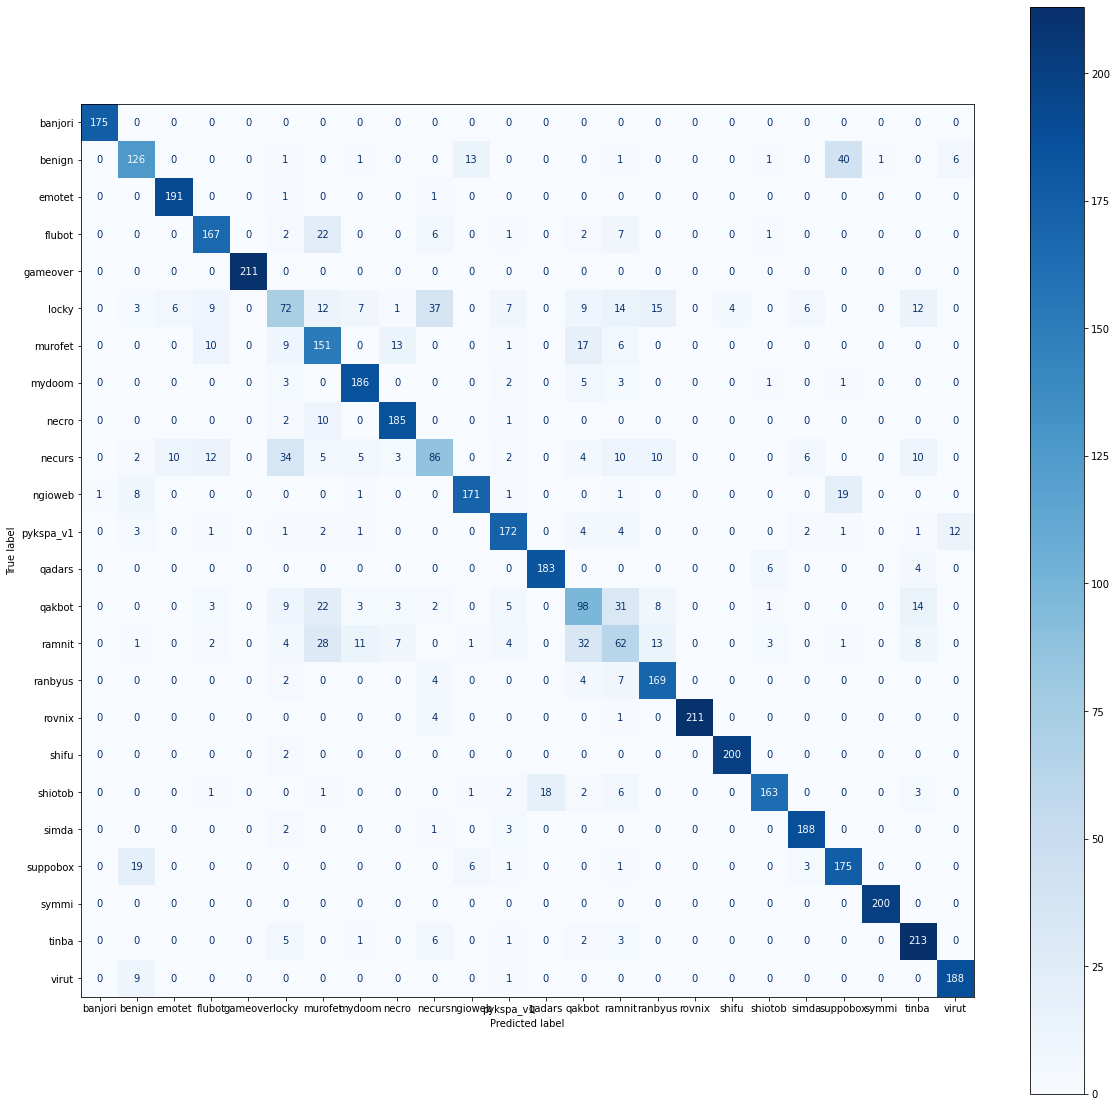

In [38]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(clf2, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

---
From the above <b>Confusion Matrix</b>, it is clearly shown how much accurate predictions and wrong predictions were made by the classifier from te test data set based on the features extracted.

---

---
### Step 7: MLP Classifier

---

In [39]:
clf3 = MLPClassifier(random_state=42, max_iter=300)

---
#### Step 7.1: Fitting the training set in the classifier

---

In [40]:
clf3.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

---
#### Step 7.2: Prediction from the test set

---

In [41]:
predicted3 = clf3.predict(X_test)

---
#### Step 7.3: Accuracy score

---

In [42]:
accuracy_score(y_test, predicted3)

0.8595833333333334

---
#### Step 7.4: Classification report

---

In [43]:
print(
    f"Classification report for classifier {clf3}:\n"
    f"{classification_report(y_test, predicted3)}\n"
)

Classification report for classifier MLPClassifier(max_iter=300, random_state=42):
              precision    recall  f1-score   support

     banjori       0.99      0.98      0.99       175
      benign       0.85      0.67      0.75       190
      emotet       0.92      1.00      0.96       193
      flubot       0.80      0.97      0.88       208
    gameover       1.00      1.00      1.00       211
       locky       0.59      0.57      0.58       214
     murofet       0.67      0.81      0.73       207
      mydoom       0.86      0.98      0.91       201
       necro       0.99      1.00      0.99       198
      necurs       0.83      0.28      0.42       199
     ngioweb       0.91      0.84      0.87       202
   pykspa_v1       0.78      0.76      0.77       204
      qadars       0.93      0.97      0.95       193
      qakbot       0.70      0.51      0.59       199
      ramnit       0.68      0.56      0.62       177
     ranbyus       0.81      1.00      0.89       18

---

<b>Analysis from Classification Report:</b><br> By using the features, MLP Classifier with random-state=42 and max-iter=300, is providing, <b>accuracy</b> of <b>86%</b>. <br>
Maximum <b>precision</b> of <b>100%</b> for <b>gameover</b>, <b>rovnix</b>, <b>shifu</b>, <b>shiotob</b> and <b>symmi</b> and minimum of <b>59%</b> for <b>locky</b> family.<br>
For <b>benign</b> family it is providing <b>85%</b> precision with <b>67%</b> recall and <b>75%</b> F1-score.<br>
Considering the recall it is giving <b>100%</b> for 6 families and more than <b>90%</b> for 9 other families among the 24 families.
    

---

---
#### Step 7.5: Confusion matrix

---

In [44]:
#disp = ConfusionMatrixDisplay.from_predictions(y_test, predicted3)

#disp.figure_.suptitle("Confusion Matrix for MLP")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

#plt.show()

/Users/peash/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


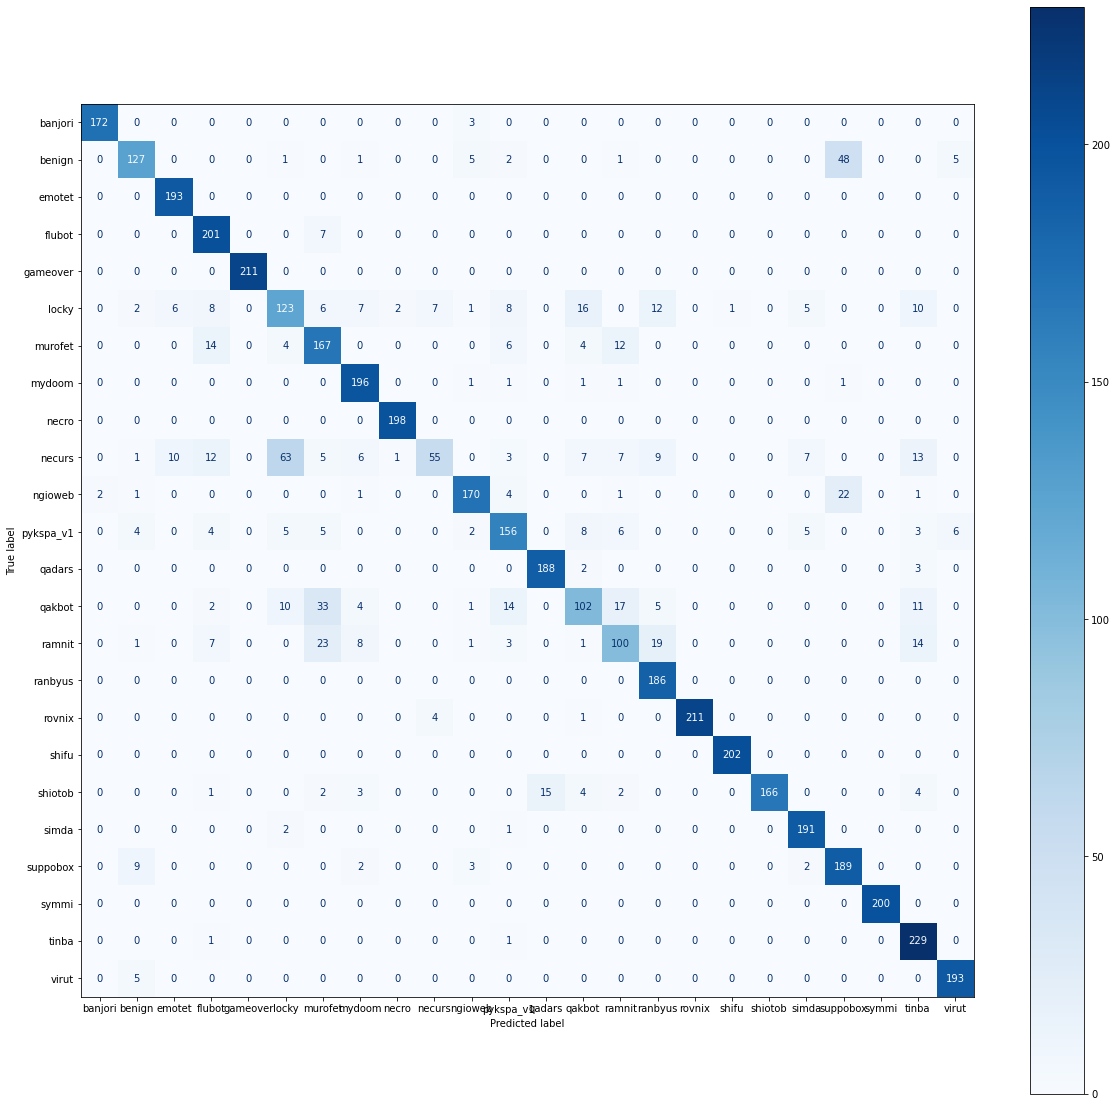

In [45]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(clf3, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

---
From the above <b>Confusion Matrix</b>, it is clearly shown how much accurate predictions and wrong predictions were made by the classifier from te test data set based on the features extracted.

---

In [46]:
df.groupby(['Family']).count().head()

,Domain
Family,
banjori,1000
benign,1000
emotet,1000
flubot,1000
gameover,1000


---
##### Observation and Conclusion: <br>

    1. For the Logistic Regression Classifier, the accuracy, precision, recall and f1-score value is comparatively far less.
    2. I have used max-iter=300, 600 and 900 and with every increase of iteration the values of performance metrics have increased.
    3. As these classifiers will be detecting DGA generated domains, the detetcion of benign family is very important. Otherwise the benign domains will be detected as DGA.
    4. The dataset we are given with is a balanced dataset as shown above. All the classes or families have equal quantity of rows. As there are several performance metrics, such as, accuracy, precision, recall and f1-score, to determine the performance of the used classifiers, accuracy is a good metric for that (Toshniwal, 2020)(Lanier, 2020).
    5. Based on the accuracy, the best model for deteting DGA URLs is the MLP Classifier. After that the Random Forest and lastly the Logistic Regression.
    6. Few more changes with the feature selection might have impact on the performance of the classifiers.
    7. Besides the features used here, I have used valid TLD list for checking the presence of any invalid TLDs. But hte list I used did not have any effect on any of the classifiers.


---

### References

Ikwu, R.E. (2021) Extracting Feature Vectors From URL Strings For Malicious URL Detection Medium.20 August 2021 [online]. Available from: https://towardsdatascience.com/extracting-feature-vectors-from-url-strings-for-malicious-url-detection-cbafc24737a [Accessed 29 March 2022].
Lanier, S.T. (2020) Choosing Performance Metrics Medium.10 December 2020 [online]. Available from: https://towardsdatascience.com/choosing-performance-metrics-61b40819eae1 [Accessed 15 May 2022].
Sconzo, M. (2022) data_hacking GitHub.5 May 2022 [online]. Available from: https://github.com/SuperCowPowers/data_hacking/blob/master/dga_detection/DGA_Domain_Detection.ipynb [Accessed 28 March 2022].
SKLearn (2018) sklearn.feature_extraction.text.CountVectorizer — scikit-learn 0.20.3 documentation Scikit-learn.org.2018 [online]. Available from: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html [Accessed 28 March 2022].
Toshniwal, R. (2020) How to select Performance Metrics for Classification Models Medium.21 January 2020 [online]. Available from: https://medium.com/analytics-vidhya/how-to-select-performance-metrics-for-classification-models-c847fe6b1ea3 [Accessed 15 May 2022].
Zhang, H., Zhou, L. and Dai, S. (2022) DGA_Detection/DGA Detection with Spark MLlib.ipynb at master · hmaccelerate/DGA_Detection GitHub.2022 [online]. Available from: https://github.com/hmaccelerate/DGA_Detection/blob/master/DGA%20Detection%20with%20Spark%20MLlib.ipynb [Accessed 30 March 2022].